# Logistic Regression with Synthetic Data

For more explanation of logistic regression, see
1. [Our course notes](https://jennselby.github.io/MachineLearningCourseNotes/#binomial-logistic-regression)
1. [This scikit-learn explanation](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
1. [The full scikit-learn documentation of the LogisticRegression model class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [1]:
import numpy.random # for generating our dataset
from sklearn import linear_model # for fitting our model

# force numpy not to use scientific notation, to make it easier to read the numbers the program prints out
numpy.set_printoptions(suppress=True)

# to display graphs in this notebook
%matplotlib inline
import matplotlib.pyplot

## Data Generation

As we did in the [linear regression notebook](https://nbviewer.jupyter.org/github/jennselby/MachineLearningCourseNotes/blob/master/assets/ipynb/LinearRegression.ipynb), we will be generating some fake data.

In this fake dataset, we have two types of plants.
* Plant A tends to be taller (average 60cm) and thinner (average 8cm).
* Plant B tends to be shorter (average 58cm) and wider (average 10cm).
* The heights and diameters of both plants are normally distributed (they follow a bell curve).

* Class 0 will represent Plant A and Class 1 will represent Plant B

In [2]:
NUM_INPUTS = 50 # inputs per class
PLANT_A_AVG_HEIGHT = 60.0
PLANT_A_AVG_WIDTH = 8.0
PLANT_B_AVG_HEIGHT = 58.0
PLANT_B_AVG_WIDTH = 10.0

# Pick numbers randomly with a normal distribution centered around the averages

plant_a_heights = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT, size=NUM_INPUTS)
plant_a_widths = numpy.random.normal(loc=PLANT_A_AVG_WIDTH, size=NUM_INPUTS)

plant_b_heights = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT, size=NUM_INPUTS)
plant_b_widths = numpy.random.normal(loc=PLANT_B_AVG_WIDTH, size=NUM_INPUTS)

# this creates a 2-dimensional matrix, with heights in the first column and widths in the second
# the first half of rows are all plants of type a and the second half are type b
plant_inputs = list(zip(numpy.append(plant_a_heights, plant_b_heights),
                        numpy.append(plant_a_widths, plant_b_widths)))

# this is a list where the first half are 0s (representing plants of type a) and the second half are 1s (type b)
classes = [0]*NUM_INPUTS + [1]*NUM_INPUTS

## Plotting

Let's visualize our dataset, so that we can better understand what it looks like.

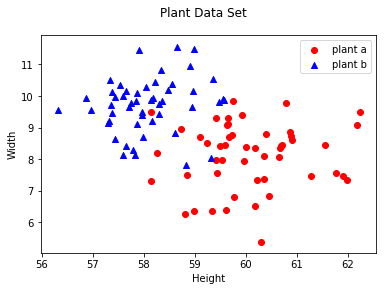

In [3]:
# create a figure and label it
fig = matplotlib.pyplot.figure()
fig.suptitle('Plant Data Set')
matplotlib.pyplot.xlabel('Height')
matplotlib.pyplot.ylabel('Width')

# put the generated points on the graph
a_scatter = matplotlib.pyplot.scatter(plant_a_heights, plant_a_widths, c="red", marker="o", label='plant a')
b_scatter = matplotlib.pyplot.scatter(plant_b_heights, plant_b_widths, c="blue", marker="^", label='plant b')

# add a legend to explain which points are which
matplotlib.pyplot.legend(handles=[a_scatter, b_scatter])

# show the graph
matplotlib.pyplot.show()

## Model Training

Next, we want to fit our logistic regression model to our dataset.

In [4]:
model = linear_model.LogisticRegression()
model.fit(plant_inputs, classes)

print('Intercept: {0}  Coefficients: {1}'.format(model.intercept_, model.coef_))

Intercept: [0.34746601]  Coefficients: [[-0.30500235  1.96320493]]


## Prediction

Now we can make some predictions using the trained model. Note that we are generating the new data exactly the same way that we generated the training data above.

In [5]:
# Generate some new random values for two plants, one of each class
new_a_height = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT)
new_a_width = numpy.random.normal(loc=PLANT_A_AVG_WIDTH)
new_b_height = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT)
new_b_width = numpy.random.normal(loc=PLANT_B_AVG_WIDTH)

# Pull the values into a matrix, because that is what the predict function wants
inputs = [[new_a_height, new_a_width], [new_b_height, new_b_width]]

# Print out the outputs for these new inputs
print('Plant A: {0} {1}'.format(new_a_height, new_a_width))
print('Plant B: {0} {1}'.format(new_b_height, new_b_width))
print('Class predictions: {0}'.format(model.predict(inputs))) # guess which class
print('Probabilities:\n{0}'.format(model.predict_proba(inputs))) # give probability of each class

Plant A: 60.924395444806265 8.28539756741921
Plant B: 60.267341221297556 10.13421039213679
Class predictions: [0 1]
Probabilities:
[[0.87746976 0.12253024]
 [0.13454963 0.86545037]]


# Exercise Option (Standard Difficulty)

Answer the following questions. You can also use the graph below, if seeing the data visually helps you understand the data.
1. What should we be expecting as the output for class predictions in the above cell? If the model is not giving the expected output, what are some of the reasons it might not be?

We should expect the output for the class predictions to be 0 1 because the first value in inputs is an A(0) plant, and the second is a B(1) plant. The model gives the right output most of the time. When it doesn't, its usually because both of the data are similar, and one of them is too high/too low by random chance.

1. How do the probabilities output by the above cell relate to the class predictions? Why do you think the model might be more or less confident in its predictions?

The less outlier-y (more amgibuous) the inputs are, the lower the probabilities are. If the probabilities are above a certain threshold (probably 50% in this case) then it will predict that index.

1. If you change the averages in the data generation code (like PLANT_A_AVG_HEIGHT) and re-run the code, how do the predictions change, and why?

They become more confident if the average of A is moved further away from B and less confident if it is moved closer.

1. Looking at the intercept and coefficient output further above, if a coefficient is negative, what has the model learned about this feature? In other words, if you took a datapoint and you increased the value of a feature that has a negative coefficient, what would you expect to happen to the probabilities the model gives this datapoint?

I thought that the value would become more negative when I increased the feature, but instead it became closer to 0. I thought that the probabilities would decrease if the feature was increased without refitting.

# Exercise Option (Advanced)

The plot above is only showing the data, and not anything about what the model learned. Come up with some ideas for how to show the model fit and implement one of them in code. Remember, we are here to help if you are not sure how to write the code for your ideas!

I'm not too sure what I did here. I think I was trying to map the accuracy vs the real data, but they aren't in the same units, and don't line up/show anything interesting/significant

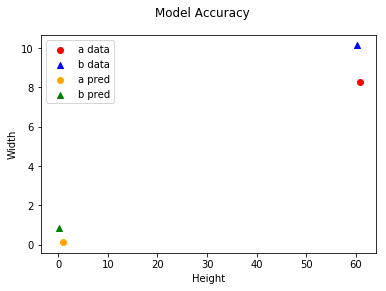

In [6]:
# TODO: generate some more data with the same method, plot them all as blue triangles and red circles.
# Need some way of predicting for each one, and showing how close the prediction was... Might have to do it artificially

# create a figure and label it
fig = matplotlib.pyplot.figure()
fig.suptitle('Model Accuracy')
matplotlib.pyplot.xlabel('Height')
matplotlib.pyplot.ylabel('Width')

proba = model.predict_proba(inputs)

# put the generated points on the graph
a_scatter = matplotlib.pyplot.scatter(new_a_height, new_a_width, c="red", marker="o", label='a data')
b_scatter = matplotlib.pyplot.scatter(new_b_height, new_b_width, c="blue", marker="^", label='b data')
a_pred = matplotlib.pyplot.scatter(proba[0][0], proba[0][1], c="orange", marker="o", label='a pred')
b_pred = matplotlib.pyplot.scatter(proba[1][0], proba[1][1], c="green", marker="^", label='b pred')

# add a legend to explain which points are which
matplotlib.pyplot.legend(handles=[a_scatter, b_scatter, a_pred, b_pred])

# show the graph
matplotlib.pyplot.show()

# Exercise Option (Advanced)

If you have more than two classes, you can use multinomial logistic regression or the one vs. rest technique, where you use a binomial logistic regression for each class that you have and decide if it is or is not in that class. Try expanding the program with a third type and implementing your own one vs. rest models. To test if this is working, compare your output to running your expanded dataset through scikit-learn, which will automatically do one vs. rest if there are more than two classes.